In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
np.random.seed(1123)
beta=np.random.uniform(0,1,2)

In [4]:
n=20#医院数
Ni=100#每家医院的人数
np.random.seed(123)
mu=np.array([0,0])
cov=np.array([[1,0.3],[0.3,1]])
x=np.random.multivariate_normal(mu,cov,(n,Ni),check_valid='raise')
'''
check_valid：这个参数用于决定当cov即协方差矩阵不是半正定矩阵时程序的处理方式，
它一共有三个值：warn，raise以及ignore。当使用warn作为传入的参数时，如果cov不是半正定
的程序会输出警告但仍旧会得到结果；当使用raise作为传入的参数时，如果cov不是半正定的程序
会报错且不会计算出结果；当使用ignore时忽略这个问题即无论cov是否为半正定的都会计算出结果。
'''
print('beta:',beta,"\n",'第一家医院的第一个病人的协变量:',x[0,0])

beta: [0.3144082 0.924563 ] 
 第一家医院的第一个病人的协变量: [0.28522585 1.4653009 ]


In [4]:
def normal(x,theta):#一元的正态分布密度函数
    mu=theta[0]
    s=theta[1]#标准差
    result=(1/(np.sqrt(2*np.pi)*s))*np.exp(-1*(x-mu)**2/(2*s**2))
    return result

In [5]:
C=3#三个亚组
weight=[0.2,0.5,0.3]
mean=[-3,0,2.5]
covs=[1,1,1]#标准差
Theta=np.array([weight,mean,covs])
Theta#混合高斯分布的参数，mean越靠近且离散程度越大，区分的难度越大
p1=int(n*weight[0])
p2=int(n*weight[1])
p3=int(n*weight[2])

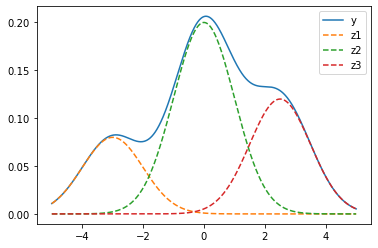

In [6]:
xnum = np.linspace(-5,5,2000) # 从0到1，等分50分
high = weight[0]*normal(xnum,Theta[1:,0])+weight[1]*normal(xnum,Theta[1:,1])+weight[2]*normal(xnum,Theta[1:,2])
z1 = weight[0]*normal(xnum,Theta[1:,0])
z2 = weight[1]*normal(xnum,Theta[1:,1])
z3 = weight[2]*normal(xnum,Theta[1:,2])
plt.figure() # 定义一个图像窗口
plt.plot(xnum,high) # 绘制曲线 y
plt.plot(xnum,z1,linestyle='--')
plt.plot(xnum,z2,linestyle='--')
plt.plot(xnum,z3,linestyle='--')
plt.legend(['y','z1','z2','z3',])
plt.show()

In [7]:
np.random.seed(123)
aa=np.random.normal(mean[0],covs[0],p1)
bb=np.random.normal(mean[1],covs[1],p2)
cc=np.random.normal(mean[2],covs[2],p3)
gamma=np.zeros((n,2))#20家医院的随机效应的具体取值，第二列为所属亚组
gamma[:,0]=np.hstack((aa,bb,cc))
gamma[:p1,1]=0
gamma[p1:(p1+p2),1]=1
gamma[-p3:,1]=2

In [8]:
np.random.seed(123)
epsilon=np.random.normal(0,0.5,(n,Ni))#所有个体的噪音取值
epsilon[0,0]

-0.5428153016502806

In [9]:
y=np.zeros((n,Ni,2))
for i in range(n):
    for j in range(Ni):
        y[i,j,0]=np.dot(x[i,j],beta)+gamma[i,0]+epsilon[i,j]
        y[i,j,1]=gamma[i,1]

In [10]:
y[0,:10]#第一家医院前十位病人的outcome value

array([[-3.18400556,  0.        ],
       [-4.4133533 ,  0.        ],
       [-2.77005997,  0.        ],
       [-2.56961671,  0.        ],
       [-5.95233186,  0.        ],
       [-2.61596672,  0.        ],
       [-7.0193312 ,  0.        ],
       [-4.01338639,  0.        ],
       [-4.8667756 ,  0.        ],
       [-5.38253807,  0.        ]])

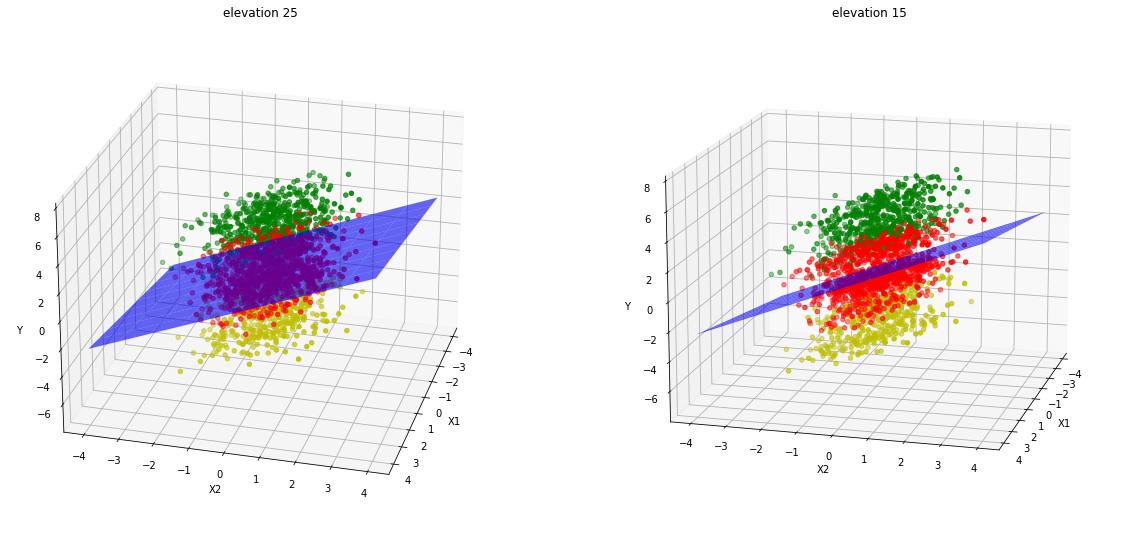

In [15]:
fig = plt.figure(figsize=(20,10))

xm = np.linspace(-4, 4,10)
ym = np.linspace(-4, 4,10)
X, Y = np.meshgrid(xm, ym)

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X,Y,Z=beta[0]*X+beta[1]*Y, color='b',alpha=0.6)
ax1.scatter(x[:p1,:,0],x[:p1,:,1], y[:p1,:,0], c='y')  # 绘制数据点
ax1.scatter(x[p1:(p1+p2),:,0],x[p1:(p1+p2),:,1], y[p1:(p1+p2),:,0], c='r')
ax1.scatter(x[-p3:,:,0],x[-p3:,:,1], y[-p3:,:,0], c='g') 
ax1.set_zlabel('Y')  # 坐标轴
ax1.set_ylabel('X2')
ax1.set_xlabel('X1')
ax1.view_init(elev=25,    # 仰角
            azim=15)   # 方位角
ax1.set_title('elevation 25')

ax2 = fig.add_subplot(122, projection='3d')  # 创建一个三维的绘图工程度
ax2.scatter(x[:p1,:,0],x[:p1,:,1], y[:p1,:,0], c='y')  # 绘制数据点
ax2.scatter(x[p1:(p1+p2),:,0],x[p1:(p1+p2),:,1], y[p1:(p1+p2),:,0], c='r')
ax2.scatter(x[-p3:,:,0],x[-p3:,:,1], y[-p3:,:,0], c='g') 
ax2.plot_surface(X,Y,Z=beta[0]*X+beta[1]*Y, color='b',alpha=0.6)
ax2.set_zlabel('Y')  # 坐标轴
ax2.set_ylabel('X2')
ax2.set_xlabel('X1')
ax2.view_init(elev=15,    # 仰角
            azim=15)   # 方位角
ax2.set_title('elevation 15')

plt.show()

In [ ]:
beta=np.random.uniform(0,1,2)
print('beta:',beta,"\n",'第一家医院的第一个病人的协变量:',x[0,0])

In [ ]:
n=20#医院数
Ni=100#每家医院的人数
np.random.seed(123)
mu=np.array([0,0])
cov=np.array([[1,0.3],[0.3,1]])
x=np.random.multivariate_normal(mu,cov,(n,Ni),check_valid='raise')

In [ ]:
x2=np.random.multivariate_normal(mu,cov,(3,300),check_valid='raise')

In [ ]:
C=3#三个亚组
weight=[0.2,0.5,0.3]
mean=[-3,0,2.5]
covs=[1,1,1]#标准差
Theta=np.array([weight,mean,covs])
Theta#混合高斯分布的参数，mean越靠近且离散程度越大，区分的难度越大
p1=int(n*weight[0])
p2=int(n*weight[1])
p3=int(n*weight[2])